In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pypsa
import matplotlib.patches as mpatches

c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\networkclustering.py:16: UserWarning: The namespace `pypsa.networkclustering` is deprecated and will be removed in PyPSA v0.24. Please use `pypsa.clustering.spatial instead`. 
  warnings.warn(


In [2]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
green1 = '#294839'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#927F48'
beige2 = '#A89677'
beige3 = '#D2CDAD'

from matplotlib.colors import ListedColormap




plt.rcParams['font.size'] = 18
zones = ['Northern', 'Oriental', 'Central', 'Southern']
zone_colors=[teal1,teal4,teal2,teal3]

# Define your custom colormap
cmap_zones = ListedColormap(zone_colors)

In [3]:
# Power production and consumption by sector
production_sectors = pd.read_excel("c:/Users/marih/test4/pypsa-earth/data/electricity_2006-2021.xlsx", nrows=14).transpose()
# Set the first row as the column names
#production_sectors.set_axis(production_sectors.iloc[0], axis=1, inplace=True)
production_sectors = production_sectors[1:]  # Remove the first row as it is now the column names
#display(production_sectors)

# Electrification rates
sheet_index = 1
electrification = pd.read_excel("c:/Users/marih/test4/pypsa-earth/data/electricity_2006-2021.xlsx", sheet_name=sheet_index,nrows = 3, )
#display(electrification)

# Power production by source
sheet_index = 1
start_row = 4
end_row = 9
production_sources = pd.read_excel("c:/Users/marih/test4/pypsa-earth/data/electricity_2006-2021.xlsx", sheet_name=sheet_index, skiprows=range(1, start_row), nrows=(end_row - start_row + 1) ).transpose()
#display(production_sources)
production_sources= production_sources.iloc[2:,1:]
new_column_names = {
    1: 'Hydro',
    2: 'Renewable thermal',
    3: 'Non-renewable thermal',
    4 : 'Wind',
    5 : 'Solar'
}

# Rename the columns
production_sources = production_sources.rename(columns=new_column_names)
#display(production_sources)
renewable_production = production_sources[['Hydro','Renewable thermal','Wind','Solar']].sum(axis=1)
#display(renewable_production)
# installed generation by source
sheet_index = 1
start_row = 10
end_row = 15

# Generation by source in percent
production_sources_per = pd.read_excel("c:/Users/marih/test4/pypsa-earth/data/electricity_2006-2021.xlsx", sheet_name=2, index_col=0 ).transpose()
#display(production_sources_per)


# Installed capacity
capacity = pd.read_excel("c:/Users/marih/test4/pypsa-earth/data/electricity_2006-2021.xlsx", sheet_name=sheet_index, skiprows=range(1, start_row), nrows=(end_row - start_row + 1) ).transpose()
capacity= capacity.iloc[2:].rename(columns=new_column_names)

#display(capacity)

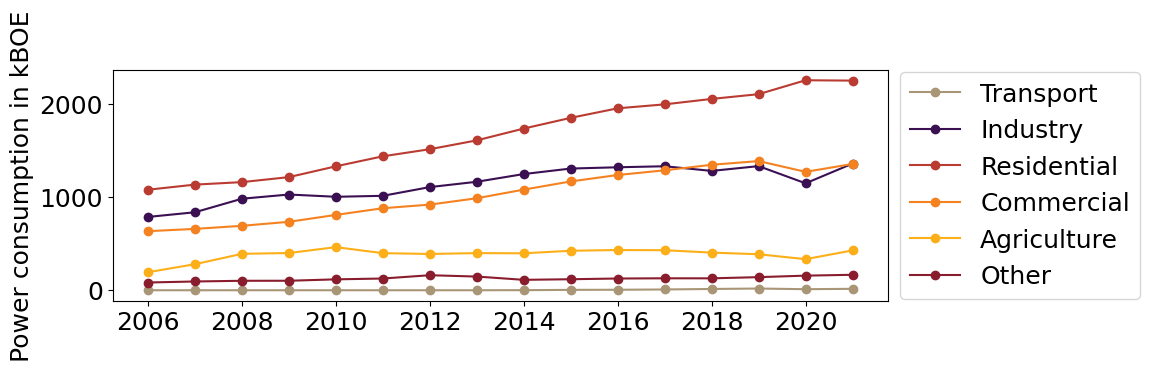

In [4]:
column_colors = [beige2,purple1,red2,orange,yellow, red1]


production_sectors.iloc[:,[6,7,8,9,10,11]].plot(kind='line', marker='o', color=column_colors, figsize=(10, 3))

# Adding labels and title
plt.ylabel('Power consumption in kBOE')
column_names = ['Transport', 'Industry','Residential','Commercial','Agriculture','Other']  # Example column names, adjust as needed
plt.legend(column_names, loc='center left', bbox_to_anchor=(1, 0.5))
# Displaying the plot
plt.show()

In [5]:
production_sources

,Hydro,Renewable thermal,Non-renewable thermal,Wind,Solar
2006,2131,0,2850,0,0
2007,2294,14,3107,0,0
2008,2281,39,3590,0,0
2009,2265,60,3888,0,0
2010,2152,58,4439,0,0
2011,2346,131,4742,0,0
2012,2352,145,5163,0,0
2013,2535,136,5392,0,0
2014,2251,126,6175,8,0
2015,2463,170,6471,11,5


(0.0, 15.0)

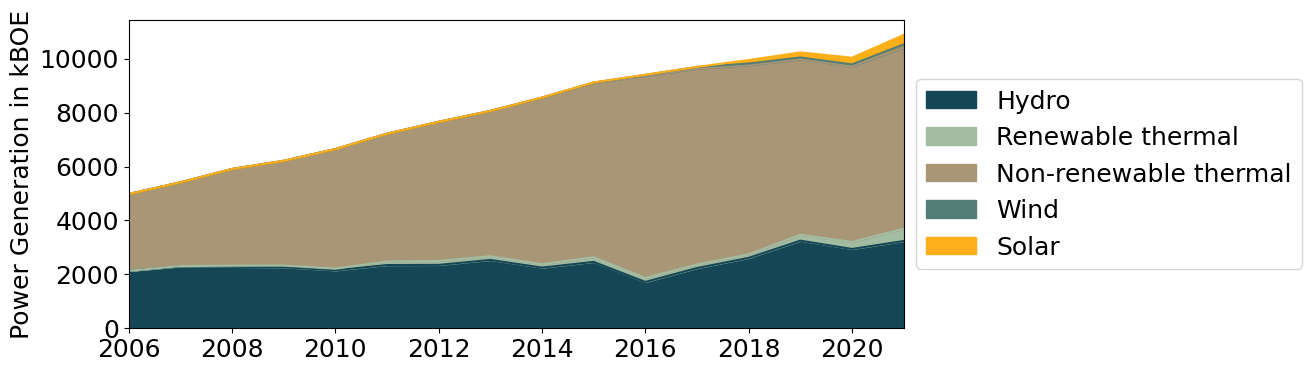

In [6]:
colors = [teal2,green3,beige2,teal3,yellow]
production_sources.plot.area(stacked=True, color=colors,figsize=(10, 4))
  # Example column names, adjust as needed
plt.ylabel('Power Generation in kBOE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,15)

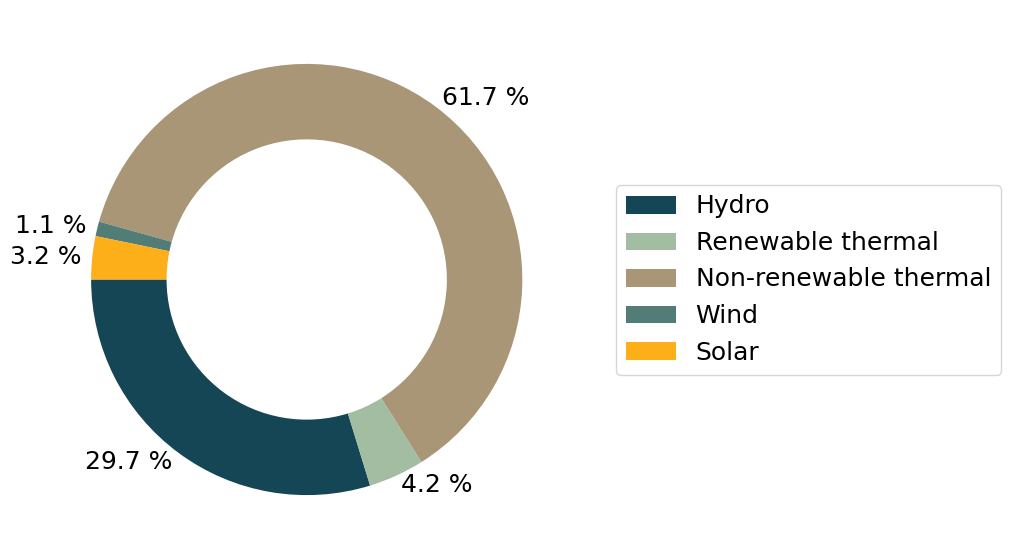

In [7]:
# Power mix in 2021
plt.rcParams['font.size'] = 18
row_index = 15  # Example row index, adjust as needed

# Extract the row as a Series
row = production_sources.iloc[row_index]
labels = ['29.7 %', '4.2 %', '61.7 %', '1.1 %', '3.2 %']
# Plot the row as a donut chart with labels placed further away
plt.figure(figsize=(7, 7))
plt.pie(row, labels=labels, wedgeprops={'width': 0.35}, startangle=180, labeldistance=1.05,colors = colors)

plt.legend(['Hydro','Renewable thermal','Non-renewable thermal','Wind','Solar'],loc='center left', bbox_to_anchor=(1.05, 0.5))

# Adding a title

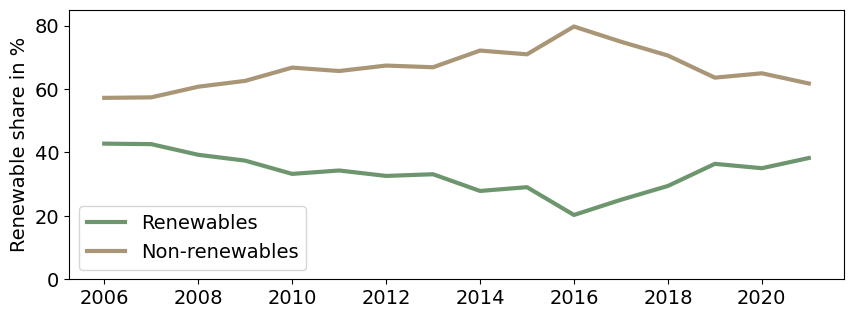

In [8]:
plt.rcParams['font.size'] = 14

(production_sources_per['Renewables']*100).plot(color=green2, linewidth = 3, figsize=(10,3.5), label = 'Renewables')
(production_sources_per['Non-renewables']*100).plot(color=beige2, linewidth = 3, figsize=(10,3.5), label = "Non-renewables")

plt.legend()
plt.ylabel("Renewable share in %")
plt.ylim(0,85)
plt.show()